Exercisie 3 Submission

3.1: website:  https://www.clinicaltrials.gov/study/NCT01985360

3.2:

Purpose of the study: In patients with advanced chronic kidney disease (CKD) and stable ischemic heart disease, does starting with an invasive strategy (coronary angiography and possible revascularization such as stenting or bypass, plus medical therapy) improve outcomes compared to a conservative strategy (medical therapy alone, reserving angiography only if symptoms or events worsen)? 
They compared long term outcomes by measuring number of death events over the timeframe os 2.2 years. They took the comulative rates for these events over the timeframe of 3 years.

3.3: 
The ISCHEMIA-CKD trial (NCT01985360) studied patients with advanced chronic kidney disease and stable ischemic heart disease, comparing an initial invasive strategy (angiography and possible revascularization plus medical therapy) to a conservative strategy (medical therapy alone, with angiography only if symptoms worsened). 
number of paritcipants was 777, 388 took invasive therapy and 389 the conservative theray. 
Distribution was random, it included males and females, and same age ranges, ethnicities and region for both criterea.
They measured number of death events over the timeframe os 2.2 years.
They took the comulative rates for these events over the timeframe of 3 years.
Confidence levels of the analysis was 95%
study type is interventional


3.4 Creating the data frame:

In [1]:
import pandas as pd

# data as a dictionary
data = {
    "Strategy": ["Invasive", "Conservative"],
    "N_Patients": [388, 389],
    "Deaths": [27, 31],
    "Percent_Deaths": [7.0, 8.0]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)



# If you want to calculate survival instead of deaths
df["Percent_Survival"] = 100 - df["Percent_Deaths"]
print(df)


       Strategy  N_Patients  Deaths  Percent_Deaths  Percent_Survival
0      Invasive         388      27             7.0              93.0
1  Conservative         389      31             8.0              92.0


3.4 Comment:

The table is a contingency table because it's classifying patients by two categorical variables (which treatment arm they were in, and whether they had death or myocardial infarction) and summarizing the counts (or incidence rates) in each combination of those categories.

3.5 As shown in the table above, Invasive survival rate is 93% and Conservative is 92%

3.6:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


n_invasive, deaths_invasive = 388, 27
n_conservative, deaths_conservative = 389, 31

# Survival outcomes: 1 = survived, 0 = died
invasive_data = np.array([1] * (n_invasive - deaths_invasive) + [0] * deaths_invasive)
conservative_data = np.array([1] * (n_conservative - deaths_conservative) + [0] * deaths_conservative)

# Bootstrap resampling
n_boot = 10000
boot_invasive = np.random.choice(invasive_data, size=(n_boot, n_invasive), replace=True).mean(axis=1)
boot_conservative = np.random.choice(conservative_data, size=(n_boot, n_conservative), replace=True).mean(axis=1)

# Convert to percentages
boot_invasive *= 100
boot_conservative *= 100


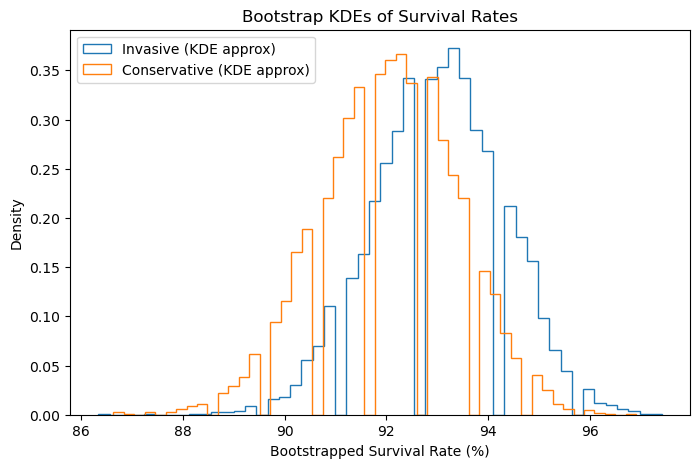

In [3]:
plt.figure(figsize=(8,5))
plt.hist(boot_invasive, bins=50, density=True, histtype="step", label="Invasive (KDE approx)")
plt.hist(boot_conservative, bins=50, density=True, histtype="step", label="Conservative (KDE approx)")
plt.xlabel("Bootstrapped Survival Rate (%)")
plt.ylabel("Density")
plt.title("Bootstrap KDEs of Survival Rates")
plt.legend()
plt.show()


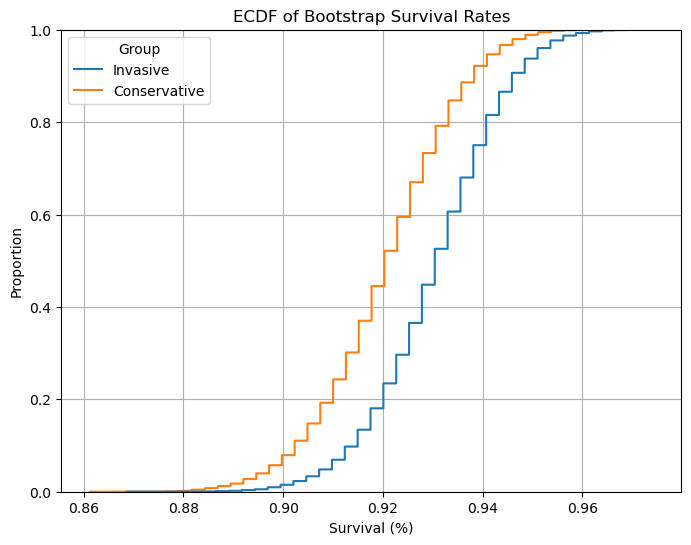

In [6]:
import seaborn as sns

# Create a DataFrame for seaborn
df = pd.DataFrame({
    "Invasive": boot_invasive,
    "Conservative": boot_conservative
})

# Melt the DataFrame into long form
df_melted = df.melt(var_name="Group", value_name="Survival (%)")

# Plot ECDF with seaborn
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=df_melted, x="Survival (%)", hue="Group")
plt.title("ECDF of Bootstrap Survival Rates")
plt.grid(True)
plt.show()


3.7

In [4]:
import numpy as np
import matplotlib.pyplot as plt


n_invasive, deaths_invasive = 388, 27
n_conservative, deaths_conservative = 389, 31

# patient-level outcomes
invasive_data = np.array([1] * (n_invasive - deaths_invasive) + [0] * deaths_invasive)
conservative_data = np.array([1] * (n_conservative - deaths_conservative) + [0] * deaths_conservative)

# Bootstrap
n_boot = 10000
boot_invasive = np.random.choice(invasive_data, size=(n_boot, n_invasive), replace=True).mean(axis=1)
boot_conservative = np.random.choice(conservative_data, size=(n_boot, n_conservative), replace=True).mean(axis=1)

# Difference in survival rates
boot_diff = (boot_invasive - boot_conservative) * 100  # percentage difference


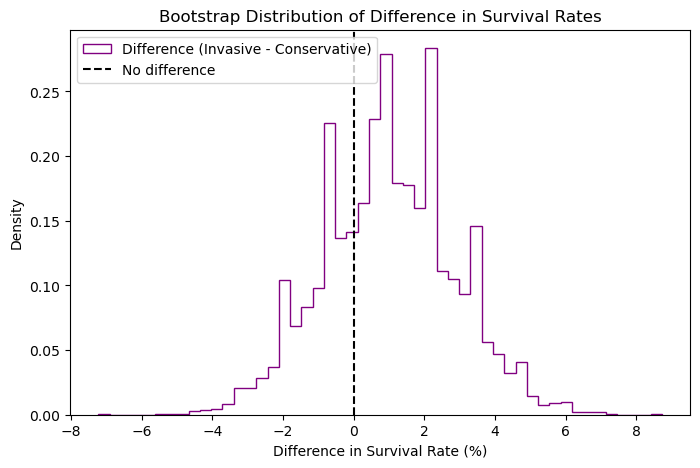

In [5]:
plt.figure(figsize=(8,5))
plt.hist(boot_diff, bins=50, density=True, histtype="step", color="purple", label="Difference (Invasive - Conservative)")
plt.axvline(0, color="black", linestyle="--", label="No difference")
plt.xlabel("Difference in Survival Rate (%)")
plt.ylabel("Density")
plt.title("Bootstrap Distribution of Difference in Survival Rates")
plt.legend()
plt.show()


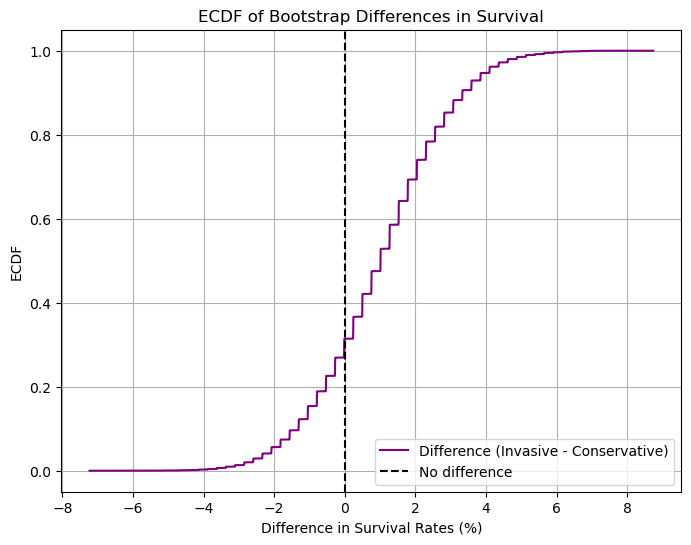

In [7]:
# Function to compute ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

# Compute ECDF for bootstrap differences
x_diff, y_diff = ecdf(boot_diff)

# Plot ECDF
plt.figure(figsize=(8, 6))
plt.plot(x_diff, y_diff, color="purple", label="Difference (Invasive - Conservative)")
plt.axvline(0, color="black", linestyle="--", label="No difference")
plt.xlabel("Difference in Survival Rates (%)")
plt.ylabel("ECDF")
plt.title("ECDF of Bootstrap Differences in Survival")
plt.legend()
plt.grid(True)
plt.show()


3.8:

Interpretition for ECDF:
For the invasive and conservative bootstrap survival ECDFs, the two curves overlap almost completely. This means the distribution of survival rates in both groups is very similar.
For the difference in survival ECDF, the curve is centered very close to 0% difference, with the distribution spreading slightly to either side. In other words, sometimes the invasive strategy looks a bit better, sometimes a bit worse, but on average there’s essentially no consistent survival benefit.
The vertical dashed line at 0 shows that a large fraction of bootstrap resamples fall on either side of it, suggesting no statistically meaningful separation

Im summary:

Based on the ECDFs, this does not appear to be an effective health intervention for improving survival in patients with advanced kidney disease and stable ischemic heart disease. The distributions show almost identical survival between invasive and conservative groups, meaning the invasive procedure adds risk without delivering measurable survival benefit.